# Geometric Transformations


In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as npimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout
from tensorflow.keras.optimizers import Adam
…
if __name__ == "__main__":
    # Run demo
    forecaster, demo_df = demo_run()
    
    # If you have your own data, uncomment the following:
    # df = pd.read_csv('your_data.csv')
    # forecaster, summary_df, best_models, comparison_df = run_forecasting_analysis(df)1

In [5]:
greyscale = r'grey.jpg'
colored = r'color.jpg'

import os

print(os.path.exists(greyscale))  # Should return True if the file exists
transformationsprint(os.path.exists(colored))


True
True


In [6]:
grey_image = cv2.imread(greyscale, cv2.IMREAD_GRAYSCALE)
color_image = cv2.imread(colored)

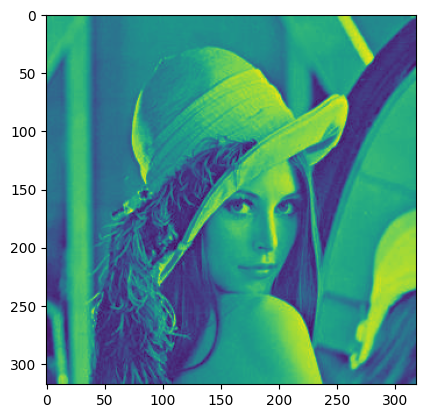

In [7]:
plt.imshow(grey_image)

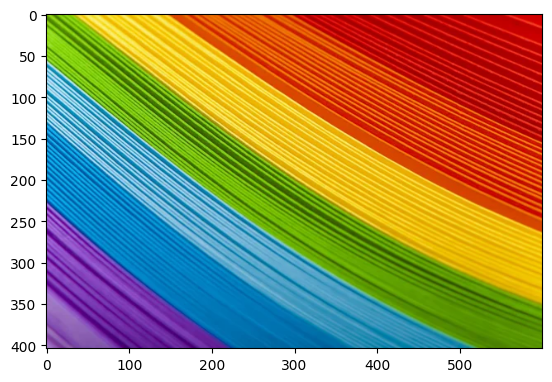

In [8]:
plt.imshow(color_image[:,:,::-1])

In [9]:
image_greyscale_transformed = cv2.resize(src=grey_image, fx=2,fy=0.5,dsize=None)

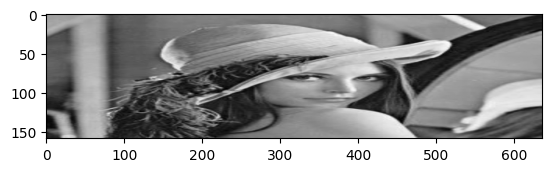

In [10]:
plt.imshow(image_greyscale_transformed, cmap='grey')

In [11]:
image_greyscale_transformed.shape,grey_image.shape

((159, 636), (318, 318))

(636, 636)

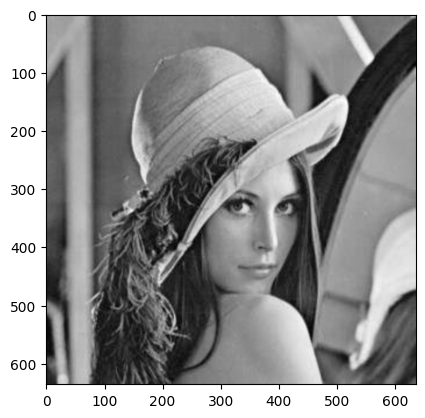

In [12]:
image_greyscale_transformed = cv2.resize(src=grey_image, fx=2,fy=2,dsize=None)
plt.imshow(image_greyscale_transformed, cmap='grey')
image_greyscale_transformed.shape

(75, 75)

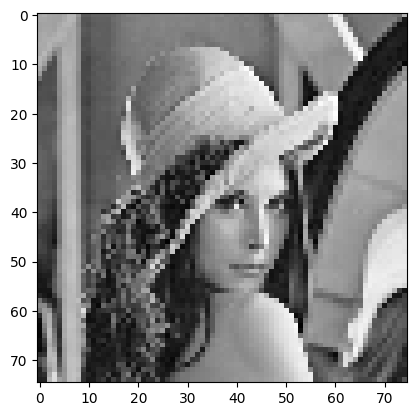

In [13]:
image_greyscale_transformed = cv2.resize(src=grey_image, fx=1,fy=1,dsize=(75,75))
plt.imshow(image_greyscale_transformed, cmap='grey')
image_greyscale_transformed.shape

# Matrix Multiplication

In [14]:
m = np.array([1,2,3])
x,y,z = 7,8,9
scaler_matrix = np.array([[x,0,0], [0,y,0], [0,0,z]])
m1 = scaler_matrix.dot(m)
m1

array([ 7, 16, 27])

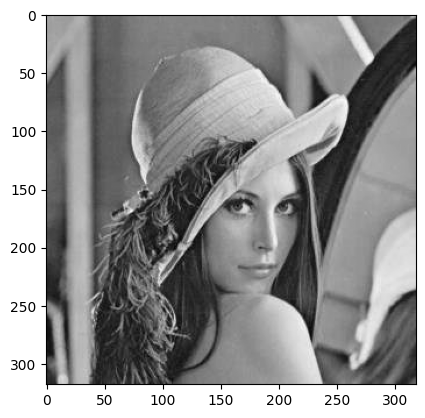

In [15]:
plt.imshow(grey_image, cmap='grey')

In [16]:
no_rows = grey_image.shape[0]
no_columns = grey_image.shape[1]


In [17]:
new_image = np.zeros((no_rows,no_columns),dtype='uint8')

In [18]:
for i in range(no_rows):
    for j in range(no_columns):
        new_image[no_rows - i -1][no_columns-j-1] = grey_image[i][j]

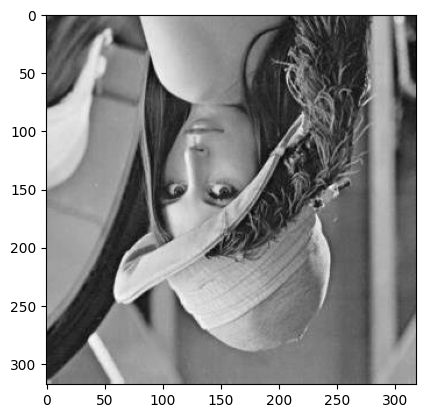

In [19]:
plt.imshow(new_image, cmap='grey')

In [20]:
rows = int(no_rows/2)
half_image = np.zeros((rows,no_columns),dtype='uint8')


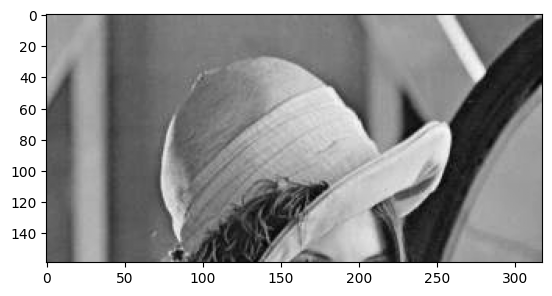

In [21]:
for i in range(rows):
    for j in range(no_columns):
        half_image[i][j] = grey_image[i][j]
plt.imshow(half_image, cmap='grey')

In [22]:
318

318

In [23]:
print(rows)
print(no_rows)

159
318


## Horizontal flip

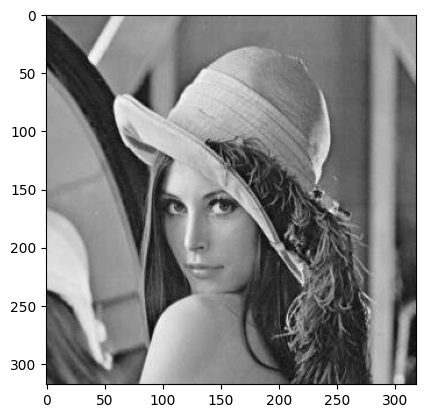

In [24]:
for i in range(no_rows):
    for j in range(no_columns):
        new_image[ i ][no_columns-j-1] = grey_image[i][j]
plt.imshow(new_image, cmap='grey')

# Inverse Transformation

In [25]:
S = np.array([[2,0],[0,2]])

In [26]:
Image1 = np.array([
    [0,0,1,0,0],
    [0,1,0,1,0],
    [1,0,0,0,1],
    [1,1,1,1,1],
    [1,0,0,0,1]
])

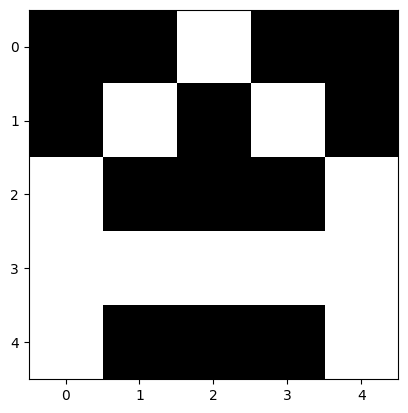

In [27]:
plt.imshow(Image1, cmap='grey')

In [28]:
row = Image1.shape[0]
col = Image1.shape[1]
print(f'row:{row} col:{col}')

row:5 col:5


In [29]:
I2 = np.zeros((2*row,2*col),dtype='uint8')

In [30]:
for i in range(row):
    for j in range(col):
        P = np.array([i,j])
        P_dash = S.dot(P)
        new_i, new_j = P_dash[0],P_dash[1]
        I2[new_i, new_j] = Image1[i, j]

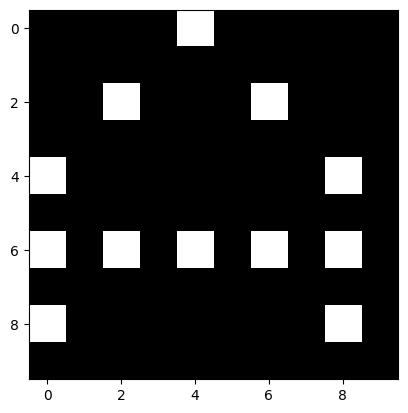

In [31]:
plt.imshow(I2,cmap='grey')

In [32]:
import matplotlib as mpl
def displayImageActualSize(I):
    dpi = mpl.rcParams['figure.dpi']
    H,W = I.shape
    figSize = W/float(dpi), H/float(dpi)
    fig = plt.figure(figsize=figSize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(I,cmap='grey')
    plt.show

In [33]:
displayImageActualSize(I2)

In [34]:
row = grey_image.shape[0]
col = grey_image.shape[1]
print(f'row:{row} col:{col}')

row:318 col:318


In [35]:
I2 = np.zeros((2*row,2*col),dtype='uint8')

In [36]:
for i in range(row):
    for j in range(col):
        P = np.array([i,j])
        P_dash = S.dot(P)
        new_i, new_j = P_dash[0],P_dash[1]
        I2[new_i, new_j] = grey_image[i, j]

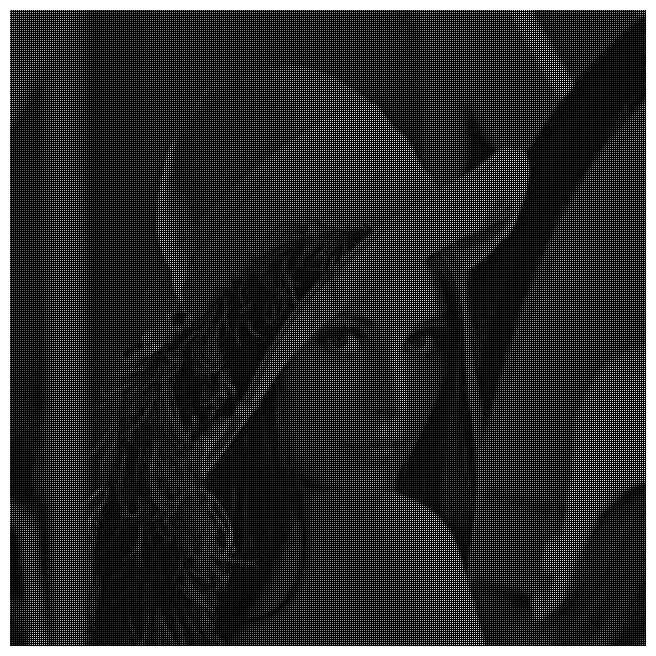

In [37]:
displayImageActualSize(I2)

In [38]:
s2 = np.array([[2,0],[0,2]])
I2 = np.zeros((2*row,2*col),dtype='uint8')
P_inv = np.linalg.inv(s2)
for new_i in range(I2.shape[0]):
    for new_j in range(I2.shape[1]):
        P_dash = np.array([new_i,new_j])
        P = P_inv.dot(P_dash)
        P = np.int16(np.floor(P))
        i, j = P[0],P[1]
        I2[new_i,new_j] = grey_image[i,j]

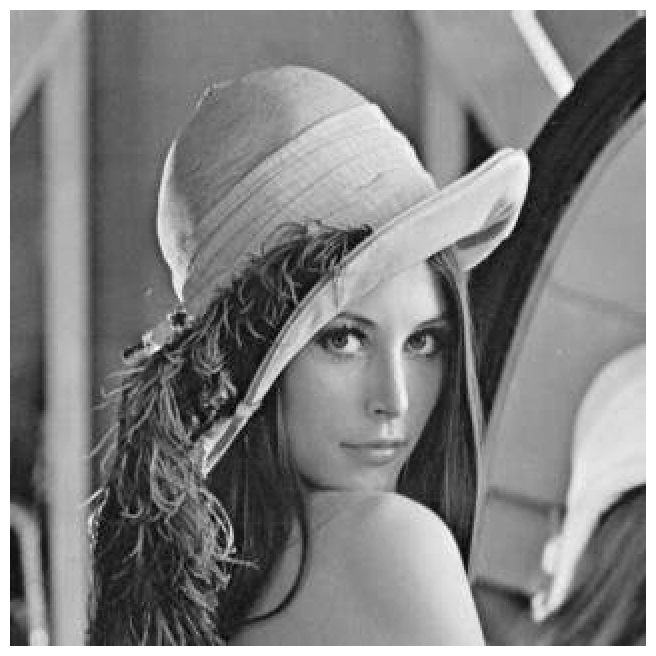

In [39]:
displayImageActualSize(I2)

# Bilinear Interpolation

In [44]:
 def f_bilinearInterpolation(r,c,I):
    lc = int(c)
    rc = lc+1
    wr = c - lc
    wl = rc - c
    tr = int(r)
    br = tr + 1
    wt = br - r
    wb = r-tr
    if tr>=0 and br<I.shape[0] and lc>=0 and rc<I.shape[1]:
        a = I[tr,lc]*wl + wr*I[tr,rc]
        b = I[br,lc]*wl + wr*I[br,rc]
        g = wt*a+wb*b
        return np.uint8(g)
    else:
        return 0


In [45]:
s2 = np.array([[2,0],[0,2]])
I2 = np.zeros((2*row,2*col),dtype='uint8')
P_inv = np.linalg.inv(s2)
for new_i in range(I2.shape[0]):
    for new_j in range(I2.shape[1]):
        P_dash = np.array([new_i,new_j])
        P = P_inv.dot(P_dash)
        #P = np.int16(np.floor(P))
        i, j = P[0],P[1]
        
        if i< 0 or i>=row or j<0 or j>=col:
            pass
        else:
            g = f_bilinearInterpolation(i,j,grey_image)
            I2[new_i,new_j] = g
            


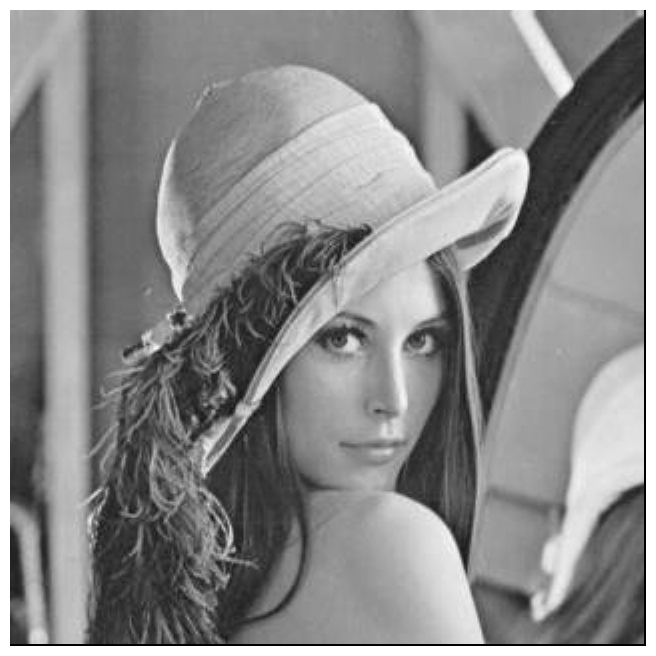

In [46]:
displayImageActualSize(I2)

In [47]:
def Scale_Image(s,grey_image):
    row = grey_image.shape[0]
    col = grey_image.shape[1]
    s2 = np.array([[s,0],[0,s]])
    I2 = np.zeros((s*row,s*col),dtype='uint8')
    P_inv = np.linalg.inv(s2)
    for new_i in range(I2.shape[0]):
        for new_j in range(I2.shape[1]):
            P_dash = np.array([new_i,new_j])
            P = P_inv.dot(P_dash)
            #P = np.int16(np.floor(P))
            i, j = P[0],P[1]
            
            if i< 0 or i>=row or j<0 or j>=col:
                pass
            else:
                g = f_bilinearInterpolation(i,j,grey_image)
                I2[new_i,new_j] = g
    return I2
            

            


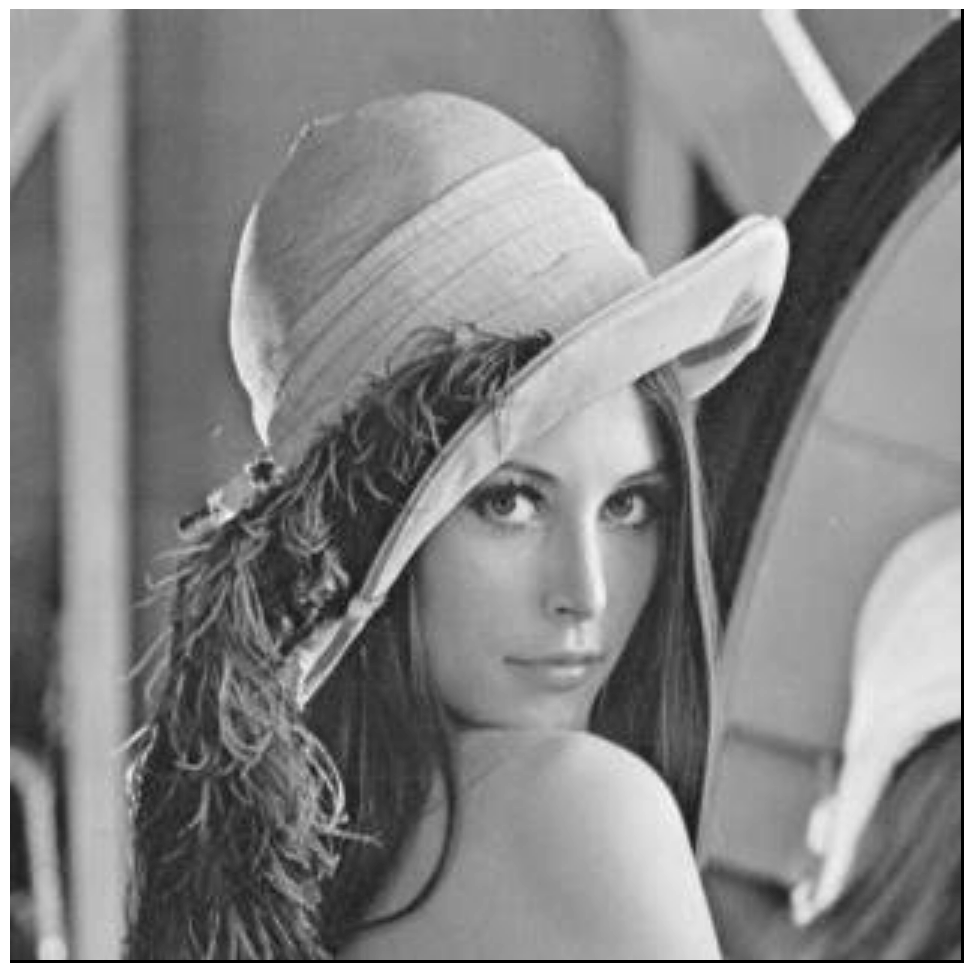

In [50]:
greyscale = r'grey.jpg'
test_img = cv2.imread(greyscale, cv2.IMREAD_GRAYSCALE)
displayImageActualSize(Scale_Image(3,test_img))

In [53]:
def displayImageActualSize(I):
    dpi = mpl.rcParams['figure.dpi']
    H,W = I.shape[0:2]
    figSize = W/float(dpi), H/float(dpi)
    fig = plt.figure(figsize=figSize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(I,cmap='grey')
    plt.show

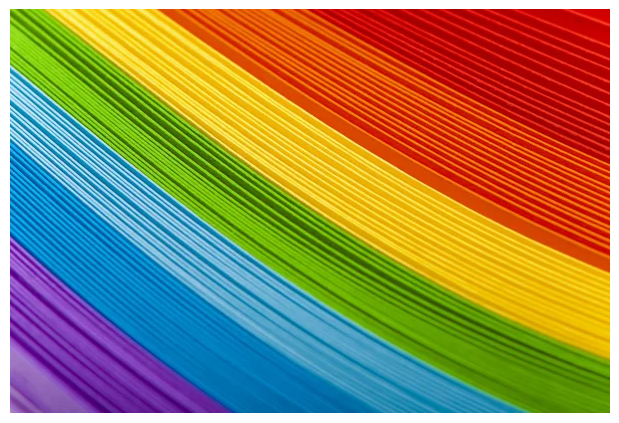

In [58]:
color_image = cv2.imread(colored)
displayImageActualSize(color_image[:,:,::-1])

In [56]:
I_col = color_image[:,:,::-1]
r = Scale_Image(2,I_col[:,:,0])
g = Scale_Image(2,I_col[:,:,1])
b = Scale_Image(2,I_col[:,:,2])

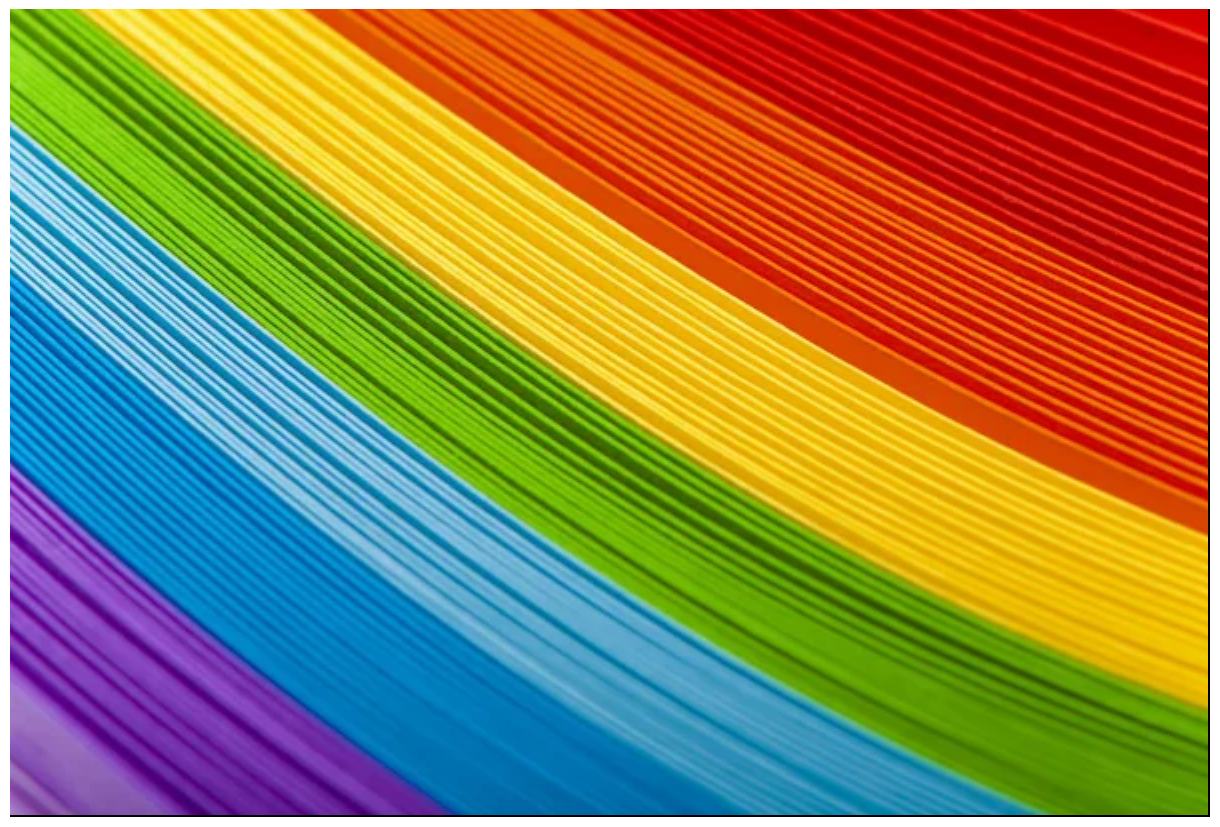

In [57]:
c = np.zeros((r.shape[0],r.shape[1],3),dtype='uint8')
c[:,:,0]=r
c[:,:,1]=g
c[:,:,2]=b
displayImageActualSize(c)